<a href="https://colab.research.google.com/github/Alisha090706/EcoScan/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Carbon Emission.csv")
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [3]:
df.shape

(10000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [7]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [10]:
# 10. View categorical columns only
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity',
       'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency',
       'Recycling', 'Cooking_With'],
      dtype='object')

In [11]:
# 11. View numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission'],
      dtype='object')

In [25]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)


Categorical: Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity',
       'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency',
       'Recycling', 'Cooking_With'],
      dtype='object')
Numerical: Index(['Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission'],
      dtype='object')


In [26]:
# Fill categorical missing values
for col in categorical_features:
    df[col] = df[col].fillna("Unknown")

# Fill numeric missing values
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())



In [27]:
df.isnull().sum()


,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,0
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


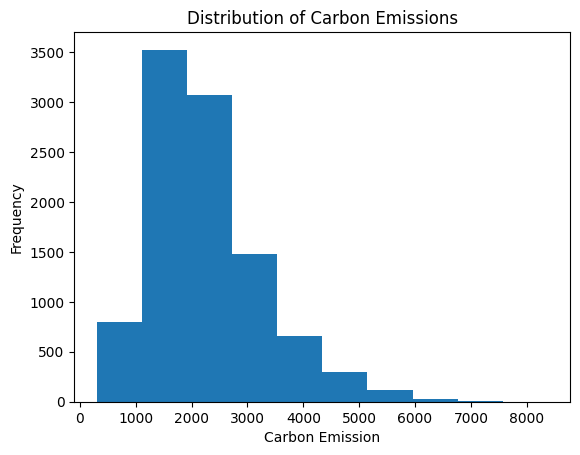

In [28]:
plt.hist(df["CarbonEmission"])
plt.xlabel("Carbon Emission")
plt.ylabel("Frequency")
plt.title("Distribution of Carbon Emissions")
plt.show()


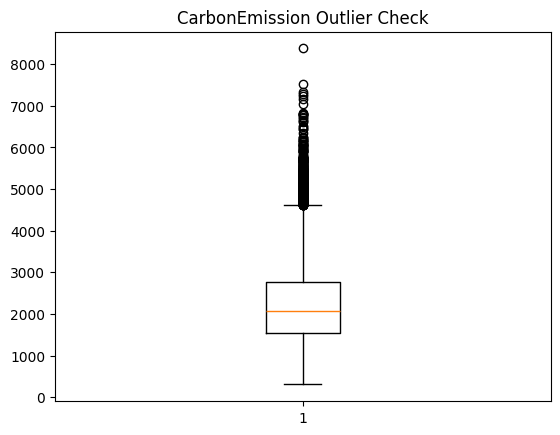

In [29]:
plt.boxplot(df["CarbonEmission"])
plt.title("CarbonEmission Outlier Check")
plt.show()


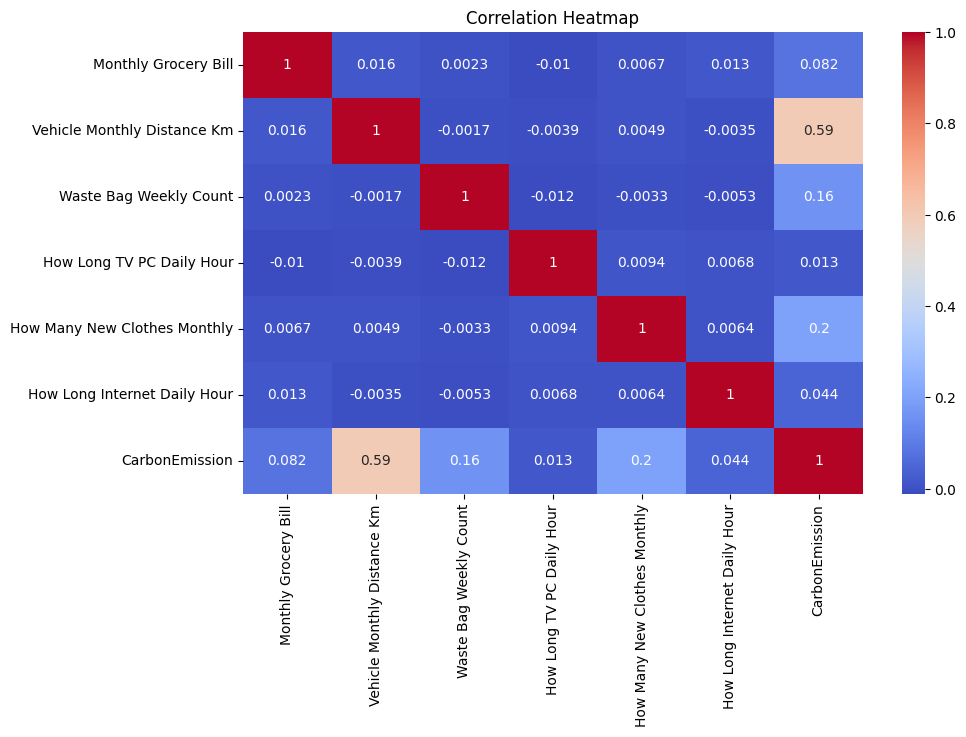

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [31]:
for col in categorical_features:
    print("\nColumn:", col)
    print(df[col].value_counts())



Column: Body Type
Body Type
underweight    2540
obese          2500
overweight     2487
normal         2473
Name: count, dtype: int64

Column: Sex
Sex
female    5007
male      4993
Name: count, dtype: int64

Column: Diet
Diet
pescatarian    2554
vegan          2497
omnivore       2492
vegetarian     2457
Name: count, dtype: int64

Column: How Often Shower
How Often Shower
daily              2546
twice a day        2516
less frequently    2487
more frequently    2451
Name: count, dtype: int64

Column: Heating Energy Source
Heating Energy Source
electricity    2552
coal           2523
wood           2463
natural gas    2462
Name: count, dtype: int64

Column: Transport
Transport
walk/bicycle    3427
public          3294
private         3279
Name: count, dtype: int64

Column: Vehicle Type
Vehicle Type
Unknown     6721
lpg          697
electric     671
petrol       647
hybrid       642
diesel       622
Name: count, dtype: int64

Column: Social Activity
Social Activity
never        3406
oft

In [34]:
df["Recycling"] = df["Recycling"].astype(str)
df["Cooking_With"] = df["Cooking_With"].astype(str)


In [35]:
for col in categorical_features:
    print("\n======", col, "======")
    display(
        df.groupby(col)["CarbonEmission"]
        .agg(["median", "mean", "min", "max"])
        .sort_values("median")
    )



====== Body Type ======


,median,mean,min,max
Body Type,,,,
underweight,1868.0,2019.027165,306,5756
normal,1972.0,2140.509503,440,6792
overweight,2161.0,2358.919984,492,7531
obese,2360.0,2561.212000,443,8377



====== Sex ======


,median,mean,min,max
Sex,,,,
female,1942.0,2102.597164,306,6515
male,2235.0,2436.164430,369,8377



====== Diet ======


,median,mean,min,max
Diet,,,,
vegetarian,2023.0,2216.814408,306,8377
vegan,2041.0,2215.761314,392,7337
pescatarian,2052.0,2251.835552,495,6816
omnivore,2193.0,2391.980738,369,7295



====== How Often Shower ======


,median,mean,min,max
How Often Shower,,,,
daily,2039.0,2238.115868,369,8377
less frequently,2046.0,2246.844793,436,7226
more frequently,2088.0,2287.193390,488,7531
twice a day,2137.0,2305.014308,306,7337



====== Heating Energy Source ======


,median,mean,min,max
Heating Energy Source,,,,
electricity,1861.0,2039.379702,306,6776
natural gas,2053.5,2248.124289,512,7295
wood,2110.0,2296.815672,488,7337
coal,2322.0,2495.060246,610,8377



====== Transport ======


,median,mean,min,max
Transport,,,,
walk/bicycle,1799.0,1879.738547,306,4415
public,1887.0,1965.789314,440,4542
private,2817.0,2980.878012,511,8377



====== Vehicle Type ======


,median,mean,min,max
Vehicle Type,,,,
electric,1808.0,1883.293592,511,3886
Unknown,1841.0,1921.912513,306,4542
hybrid,2611.0,2708.500000,689,5474
diesel,3181.0,3230.204180,975,6142
lpg,3266.0,3352.063128,743,6816
petrol,3730.0,3749.887172,572,8377



====== Social Activity ======


,median,mean,min,max
Social Activity,,,,
never,2018.0,2209.652085,369,7226
sometimes,2064.0,2251.800611,306,7531
often,2149.0,2347.318771,436,8377



====== Frequency of Traveling by Air ======


,median,mean,min,max
Frequency of Traveling by Air,,,,
never,1511.0,1716.337129,306,5360
rarely,1704.0,1945.872830,369,6233
frequently,2160.5,2362.866482,890,7033
very frequently,2792.5,3026.455906,1467,8377



====== Waste Bag Size ======


,median,mean,min,max
Waste Bag Size,,,,
small,1875.0,2063.123168,369,7033
medium,2005.0,2219.065481,306,7531
large,2155.0,2343.165134,412,8377
extra large,2266.5,2452.745200,392,7337



====== Energy efficiency ======


,median,mean,min,max
Energy efficiency,,,,
Sometimes,2056.0,2269.151314,412,7226
Yes,2077.5,2252.135404,306,8377
No,2108.0,2286.656628,369,7531



====== Recycling ======


,median,mean,min,max
Recycling,,,,
"['Paper', 'Glass', 'Metal']",1896.0,2148.131376,306,6355
"['Paper', 'Plastic', 'Glass', 'Metal']",1903.0,2066.594976,440,7337
"['Paper', 'Plastic', 'Glass']",1913.0,2116.426871,412,5906
"['Paper', 'Metal']",1973.0,2207.938879,559,5918
"['Paper', 'Plastic', 'Metal']",2003.0,2135.927469,436,6816
"['Plastic', 'Glass', 'Metal']",2010.0,2154.405751,533,7033
"['Plastic', 'Metal']",2012.5,2230.244444,545,7159
"['Paper', 'Glass']",2059.0,2249.881494,392,8377
"['Paper', 'Plastic']",2089.0,2261.982622,609,6792



====== Cooking_With ======


,median,mean,min,max
Cooking_With,,,,
[],1916.0,2172.205638,392,6170
"['Grill', 'Airfryer']",1986.0,2214.212479,436,6810
['Oven'],2032.0,2247.869852,369,6719
"['Stove', 'Microwave']",2044.0,2191.699200,412,5985
"['Microwave', 'Grill', 'Airfryer']",2054.0,2225.802568,593,6232
"['Stove', 'Grill', 'Airfryer']",2072.5,2277.867834,524,6776
"['Stove', 'Microwave', 'Grill', 'Airfryer']",2075.5,2250.725460,488,6515
['Microwave'],2081.0,2258.776167,443,6498
"['Oven', 'Microwave']",2082.0,2320.554700,611,6738


In [39]:
df_model = pd.get_dummies(df, drop_first=True)
df_model = df_model.astype(int)
df_model.head()


,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_obese,Body Type_overweight,Body Type_underweight,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
0,230,210,4,7,26,1,2238,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,114,9,3,9,38,5,1892,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,138,2472,1,14,47,6,2595,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,157,74,3,20,5,7,1074,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,266,8457,1,3,5,6,4743,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
df_model.to_csv("Cleaned_Carbon_Emission.csv", index=False)


In [42]:
from google.colab import files
files.download("Cleaned_Carbon_Emission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>